In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# We can see all columns in df.head() / and .tail()
pd.set_option('display.max_columns', None)

# Read in the data

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1tq4NEEKTnchbTlXlzfgNNAxY2n0azvhp' #<-- You add in here the id from you google drive file, you can find it
download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.csv')
combined_df  = pd.read_csv("file.csv")

In [ ]:
pd.set_option('display.max_columns', 1000)  
pd.set_option('display.max_rows', 1000) 

combined_df.head()


,Unnamed: 0,Distance,CityDamageFlag_False,CityDamageFlag_True,ShortFormFlag_False,ShortFormFlag_True,PedestrianAction_Approaching/Leaving School Bus,PedestrianAction_Crossing - Not In Crosswalk,PedestrianAction_Crossing In Crosswalk - At Intersection,PedestrianAction_Crossing In Crosswalk - Not At Intersection,PedestrianAction_In Road - Includes Shoulder,PedestrianAction_No Pedestrians Involved,PedestrianAction_Not In Road,PedestrianAction_Other,PedestrianAction_Running/Jogging,PedestrianAction_Unknown,PedestrianAction_Walking,RoadwaySurface_Dry,RoadwaySurface_Slippery (Muddy Oily etc.),RoadwaySurface_Snowy - Icy,RoadwaySurface_Unknown,RoadwaySurface_Wet,RoadwayCondition_Construction - Repair Zone,RoadwayCondition_Flooded,RoadwayCondition_Holes Deep Rut,RoadwayCondition_Loose Material On Roadway,RoadwayCondition_No Unusual Conditions,RoadwayCondition_Obstruction On Roadway,RoadwayCondition_Other,RoadwayCondition_Reduced Roadway Width,RoadwayCondition_Unknown,Lighting_Dark - No Street Light,Lighting_Dark - Street Light,Lighting_Dark - Street Light Not Functioning,Lighting_Daylight,Lighting_Dusk - Dawn,Lighting_Unknown,PrimaryCollisionFactor_Bike At Fault,PrimaryCollisionFactor_Fell Asleep,PrimaryCollisionFactor_Other Improper Driving,PrimaryCollisionFactor_Other Than Driver,PrimaryCollisionFactor_Parked/Rolling,PrimaryCollisionFactor_Pedestrian At Fault,PrimaryCollisionFactor_Unknown,PrimaryCollisionFactor_Violation Driver 1,PrimaryCollisionFactor_Violation Driver 2,TrafficControl_Controls Functioning,TrafficControl_Controls Not Functioning,TrafficControl_Controls Obscured,TrafficControl_No Controls Present/Factor,TrafficControl_Unknown,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,Weather_Rain,Weather_Snow,Weather_Unknown,Weather_Wind,CollisionType_Broadside,CollisionType_Head On,CollisionType_Hit Object,CollisionType_Other,CollisionType_Overturned,CollisionType_Rear End,CollisionType_Sideswipe,CollisionType_Vehicle/Bike,CollisionType_Vehicle/Pedestrian,ProximityToIntersection_Driveway,ProximityToIntersection_Intersection,ProximityToIntersection_Non-Related,ProximityToIntersection_Related,VehicleInvolvedWith_Animal,VehicleInvolvedWith_Bike,VehicleInvolvedWith_Fixed Object,VehicleInvolvedWith_Ice Cream Truck,VehicleInvolvedWith_Light Rail Vehicle,VehicleInvolvedWith_Motor Vehicle On Other Roadway,VehicleInvolvedWith_Motorcycle,VehicleInvolvedWith_Non-Collision,VehicleInvolvedWith_Other Object,VehicleInvolvedWith_Other Vehicle,VehicleInvolvedWith_Parked Vehicle,VehicleInvolvedWith_Pedestrian,VehicleInvolvedWith_Scooter Motorized,VehicleInvolvedWith_Scooter Non-Motorized,VehicleInvolvedWith_Skateboard,VehicleInvolvedWith_Train,VehicleInvolvedWith_Unknown,VehicleInvolvedWith_Wheelchair,PedestrianDirectionFrom_East,PedestrianDirectionFrom_No Direction (Not Walking),PedestrianDirectionFrom_North,PedestrianDirectionFrom_Northeast,PedestrianDirectionFrom_Northwest,PedestrianDirectionFrom_Not Applicable,PedestrianDirectionFrom_South,PedestrianDirectionFrom_Southeast,PedestrianDirectionFrom_Southwest,PedestrianDirectionFrom_Unknown,PedestrianDirectionFrom_West,PedestrianDirectionTo_East,PedestrianDirectionTo_No Direction (Not Walking),PedestrianDirectionTo_North,PedestrianDirectionTo_Northeast,PedestrianDirectionTo_Northwest,PedestrianDirectionTo_Not Applicable,PedestrianDirectionTo_South,PedestrianDirectionTo_Southeast,PedestrianDirectionTo_Southwest,PedestrianDirectionTo_Unknown,PedestrianDirectionTo_West,DirectionFromIntersection_At,DirectionFromIntersection_East Of,DirectionFromIntersection_North Of,DirectionFromIntersection_South Of,DirectionFromIntersection_Unknown,DirectionFromIntersection_West Of,Sex,Age,VD_Major,VD_Minor,VD_Moderate,VD_N/A,VD_None,VD_Totaled,VD_Unknown,PC_Bicycle,PC_Driver,PC_Other,PC_Parked,PC_Pedestrian,PC_Unknown,Had Been Drinking - Impairment Unknown,Had Been Drinking - Not Under Influence,Had Been Drinking - Under Influence,Had Not Been Drinking,Impairment Not Known,Impairment Physical,Sleepy/Fati

In [ ]:
combined_df.shape

(41423, 299)

In [ ]:
combined_df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
combined_df.shape

(41423, 298)

# Setting up data for training and testing

## Splitting the data into train and test

In [ ]:
# Split into 70% training and 30% for testing
# The 70% will be used with stratified k-fold to train and validate
y = combined_df['Severity'] #Features to be used for prediction
X = combined_df.drop('Severity',axis=1) #Target feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Stratified K-Fold to evaluate models on training data

In [ ]:
# Setting up Stratified k-fold to test on training data and validate
# K=5, which means there's 5 folds
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)

# Data Regularization

In [ ]:
# Lasso L1 AND L2
# model = LogisticRegression(max_iter = 200, random_state = 42)
# lasso = LogisticRegression(penalty='l1', solver='liblinear',random_state=42)
# ridge = LogisticRegression(penalty='l2', random_state=42)

In [ ]:
# clfs = {'baseline_logistic_regression' : model, 'lasso_log_reg': lasso, 'ridge_log_reg': ridge}

In [ ]:
def train_classifier(clf, X_train, y_train):      #function to train all the models
    clf.fit(X_train, y_train)

def predict_labels(clf, X_test):                 # function to predict all the models
    return (clf.predict(X_test))  

# pred_scores = []
# for k,v in clfs.items():
#     train_classifier(v,x_train,y_train)
#     pred = predict_labels(v,x_test)
#     pred_scores.append((k, accuracy_score(y_test,pred),f1_score(y_test,pred,average = 'weighted')))

In [ ]:
# scores = pd.DataFrame(pred_scores,columns = ['Classifier','Accuracy Score','F1 Score'])
# scores = scores.set_index('Classifier')
# scores

In [ ]:
# scores.plot(kind='bar', ylim=(0.4,1.0), figsize=(11,6), align='center')
# plt.ylabel('Scores')
# plt.title('Distribution by Classifier')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
# plt.xticks(rotation=0)
# plt.show()

# RFE-CV (delete maybe)

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
rfe_mod = RFECV(RandomForestClassifier(), cv=2, scoring='f1_macro')
rfe_mod.fit(X_train, y_train)  

RFECV(cv=2, estimator=RandomForestClassifier(), scoring='f1_macro')

Optimal number of features : 101


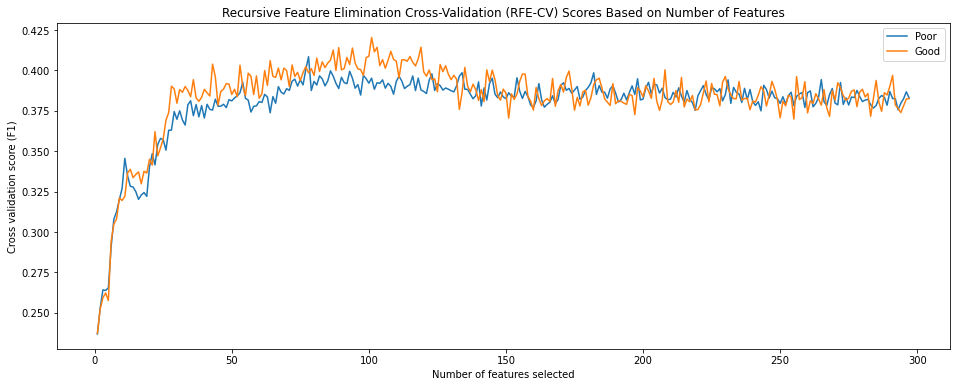

In [ ]:
print("Optimal number of features : %d" % rfe_mod.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure( figsize=(16, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (F1)")
plt.plot(
    range(1, len(rfe_mod.grid_scores_) + 1),
    rfe_mod.grid_scores_,
)
plt.title('Recursive Feature Elimination Cross-Validation (RFE-CV) Scores Based on Number of Features')
plt.legend(['Poor','Good','Standard'])
plt.show()

In [ ]:
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': rfe_mod.support_[i], 'ranking': rfe_mod.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='ranking').head(10)

,feature,support,ranking
0,0,True,1
142,142,True,1
136,136,True,1
135,135,True,1
134,134,True,1
133,133,True,1
132,132,True,1
127,127,True,1
126,126,True,1
125,125,True,1


In [ ]:
df_features[df_features['support']==True]

,feature,support,ranking
0,0,True,1
1,1,True,1
2,2,True,1
3,3,True,1
4,4,True,1
7,7,True,1
10,10,True,1
16,16,True,1
20,20,True,1
25,25,True,1


In [ ]:
selected_features = rfe_mod.get_support(1)
X_RFE = X_train[X_train.columns[selected_features]]

In [ ]:
X_RFE_test = X_test[X_test.columns[selected_features]]

In [ ]:
X_RFE.head()

,Distance,CityDamageFlag_False,CityDamageFlag_True,ShortFormFlag_False,ShortFormFlag_True,PedestrianAction_Crossing In Crosswalk - At Intersection,PedestrianAction_No Pedestrians Involved,RoadwaySurface_Dry,RoadwaySurface_Wet,RoadwayCondition_No Unusual Conditions,RoadwayCondition_Unknown,Lighting_Dark - Street Light,Lighting_Daylight,Lighting_Dusk - Dawn,PrimaryCollisionFactor_Unknown,PrimaryCollisionFactor_Violation Driver 1,TrafficControl_Controls Functioning,TrafficControl_No Controls Present/Factor,TrafficControl_Unknown,Weather_Clear,Weather_Cloudy,Weather_Rain,CollisionType_Broadside,CollisionType_Head On,CollisionType_Hit Object,CollisionType_Other,CollisionType_Rear End,CollisionType_Sideswipe,CollisionType_Vehicle/Bike,CollisionType_Vehicle/Pedestrian,ProximityToIntersection_Driveway,ProximityToIntersection_Intersection,ProximityToIntersection_Non-Related,ProximityToIntersection_Related,VehicleInvolvedWith_Bike,VehicleInvolvedWith_Fixed Object,VehicleInvolvedWith_Motorcycle,VehicleInvolvedWith_Other Vehicle,VehicleInvolvedWith_Parked Vehicle,VehicleInvolvedWith_Pedestrian,PedestrianDirectionFrom_Not Applicable,PedestrianDirectionTo_Not Applicable,DirectionFromIntersection_At,DirectionFromIntersection_East Of,DirectionFromIntersection_North Of,DirectionFromIntersection_South Of,DirectionFromIntersection_Unknown,DirectionFromIntersection_West Of,Sex,Age,VD_Major,VD_Minor,VD_Moderate,VD_N/A,VD_None,VD_Totaled,VD_Unknown,PC_Bicycle,PC_Driver,Had Been Drinking - Impairment Unknown,Had Been Drinking - Not Under Influence,Had Been Drinking - Under Influence,Had Not Been Drinking,Impairment Not Known,Direction_Unknown,East,North,South,West,Bicycle,Car,Motorcycle/Moped,Panel Truck,Changing Lanes,Entering Traffic,Making Left Turn,Making Right Turn,Making U-Turn,Other Unsafe Turning,Proceeding Straight,Ran Off Road,Slowing/Stopping,Stopped,Inattention,OtherAssociatedFactor_N/A,OtherAssociatedFactor_NoneApparent,OtherAssociatedFactor_OtherViolation,OtherAssociatedFactor_Unknown,21453,21658,21703,21801,21802,21804,22107,22350,22450,23152,23153,ViolationCode_N/A,ViolationCode_Unknown
4216,0.322581,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.107143,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31298,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.154762,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8574,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.261905,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26716,0.230415,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.119048,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12989,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.

In [ ]:
X_RFE.shape

(28996, 101)

# Data Reduction

In [ ]:
# Cite Source: Hands-On Machine Learning w/ Scikit-Learn by Aurelien Geron ************

# Instead of arbitrarily choosing the number of dimensions to reduce down to, it is
# simpler to choose the number of dimensions that add up to 95% variance
from sklearn.decomposition import PCA

# Computes the minimum number of dimensions required to preserve 95% of the training
# set's variance
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1  # d equals 75
d

76

In [ ]:
# n_components is the ratio of variance we wish to preserve
# We know that 75 features will preserve 95% variance
# So we will set 'n_components' = d 
pca = PCA(n_components=d)

# Apply to x_train and x_test
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [ ]:
# Check number of columns
# 75 @ 95% variance
pca.n_components_

76

In [ ]:
# check variance to ensure 95%
pca.explained_variance_ratio_.sum()  

0.9512502066323071

In [ ]:
# plt.figure(figsize=(6, 4))
# plt.plot(cumsum, linewidth=3)
# plt.axis([0, 400, 0, 1])
# plt.xlabel("Dimensions")
# plt.ylabel("Explained Variance")
# plt.plot([d, d], [0, 0.95], "k:")
# plt.plot([0, d], [0.95, 0.95], "k:")
# plt.plot(d, 0.95, "ko")
# plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
#              arrowprops=dict(arrowstyle="->"))
# plt.grid(True)
# #save_fig("explained_variance_plot")
# plt.show()

In [ ]:
# Test PCA
# model2 = LogisticRegression(max_iter = 200, random_state = 42)
# pca_mod = LogisticRegression(max_iter = 200, random_state = 42)

# pred_scores2 = []

# clfs2 = {'baseline_logistic_regression' : model2, 'pca_log_reg': pca}

# pca_mod.fit(X_train_reduced,y_train)
# y_pred_pca = pca_mod.predict(X_test_reduced)

# model2.fit(x_train,y_train)
# y_pred_baseline2 = model.predict(x_test)

# pred_scores2.append((list(clfs2.keys())[0],accuracy_score(y_test,y_pred_baseline2),f1_score(y_test,y_pred_baseline2,average='weighted')))
# pred_scores2.append((list(clfs2.keys())[1],accuracy_score(y_test,y_pred_pca),f1_score(y_test,y_pred_pca,average='weighted')))

In [ ]:
# pca 0.711866  0.694810 @ 95% variance
# From 297 features down to just 75 and our scores are nearly the exact same. This is good. 
# scores2 = pd.DataFrame(pred_scores2,columns = ['Classifier','Accuracy Score','F1 Score'])
# scores2 = scores2.set_index('Classifier')
# scores2

In [ ]:
# scores2.plot(kind='bar', ylim=(0.4,1.0), figsize=(11,6), align='center')
# plt.ylabel('Scores')
# plt.title('Distribution by Classifier after PCA')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
# plt.xticks(rotation=0)
# plt.show()

In [ ]:
# dfandy=pd.DataFrame(y_train)
# dfandy1=pd.DataFrame(X_test_reduced)

In [ ]:
# dfandy.head()

In [ ]:
# dfandy1.info(verbose=False)

### Random Forest Feature Selection

In [ ]:
# PCA vs Random Forest
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
# Random Forest feature importance in descending order
importances = rnd_clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = combined_df.columns[0:]

feats = []

for f in range(X_train.shape[1]):
    feats.append(feat_labels[sorted_indices[f]])
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Age                            0.085959
 2) ShortFormFlag_True             0.044276
 3) ShortFormFlag_False            0.038632
 4) Distance                       0.032211
 5) VD_Unknown                     0.030828
 6) ViolationCode_Unknown          0.021306
 7) ViolationCode_N/A              0.019806
 8) Sex                            0.019533
 9) VD_Major                       0.016691
10) Had Not Been Drinking          0.016298
11) VehicleInvolvedWith_Other Vehicle 0.015777
12) South                          0.014184
13) North                          0.013885
14) East                           0.013732
15) West                           0.013592
16) Proceeding Straight            0.013431
17) VD_Moderate                    0.012611
18) Lighting_Daylight              0.012598
19) Impairment Not Known           0.012499
20) OtherAssociatedFactor_N/A      0.012414
21) VD_Minor                       0.012265
22) PrimaryCollisionFactor_Unknown 0.012186
23) 22350                    

In [ ]:
df_word = pd.DataFrame(feats, columns = ['Feat_Names'])

In [ ]:
df_word.shape

(297, 1)

In [ ]:
df_word = df_word[:15]

In [ ]:
df_word.shape

(15, 1)

In [ ]:
df_word.head()

,Feat_Names
0,Age
1,ShortFormFlag_True
2,ShortFormFlag_False
3,Distance
4,VD_Unknown


In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

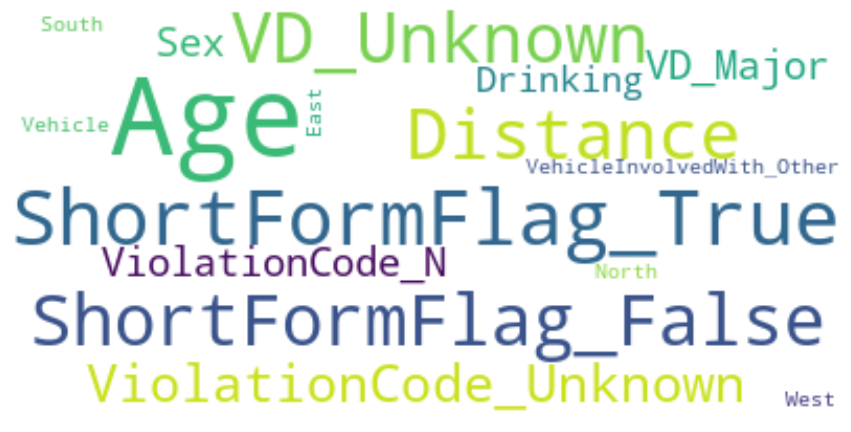

In [ ]:

text = " ".join(i for i in df_word['Feat_Names'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sampling SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

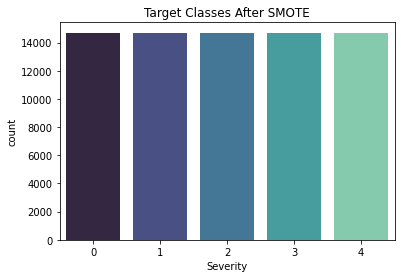

In [ ]:
sns.countplot(y_res,palette = 'mako');
plt.title('Target Classes After SMOTE');

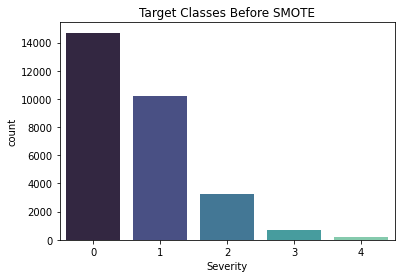

In [ ]:
plt.title('Target Classes Before SMOTE')
sns.countplot(y_train, palette = 'mako');

In [ ]:
X.shape

(41423, 297)

In [ ]:
X_test.shape

(12427, 297)

In [ ]:
X_train.shape

(28996, 297)

In [ ]:
X_res.shape

(73530, 297)

In [ ]:
y_train.value_counts()

0    14706
1    10206
2     3218
3      681
4      185
Name: Severity, dtype: int64

In [ ]:
# 0    14706
# 1    10206
# 2     3218
# 3      681
# 4      185
y_res.value_counts()

0    14706
2    14706
1    14706
4    14706
3    14706
Name: Severity, dtype: int64

In [ ]:
# training set size before
y_train.shape

(28996,)

In [ ]:
# training set size now
y_res.shape

(73530,)

In [ ]:
# RFECV w/ SMOTE
sm2 = SMOTE(random_state=42)
X_res_rfe, y_res_rfe = sm2.fit_resample(X_RFE, y_train)

In [ ]:
y_test.shape

(12427,)

# PCA + SMOTE

In [ ]:
# Apply to x_train and x_test
# X_train_reduced = pca.fit_transform(X_train)
# X_test_reduced = pca.transform(X_test)
sm2 = SMOTE(random_state=42)
X_res_pca, y_res = sm2.fit_resample(X_train_reduced, y_train)


# Models

## Logistic Regression (Baseline)

In [ ]:
lgr_clf = LogisticRegression(random_state = 42)

In [ ]:
# stratified k-fold (k=5) on training data w/ f1 metric
lgr_scores = cross_val_score(lgr_clf, X_train, y_train, cv= skfold, scoring='f1_macro')

In [ ]:
print("Stratified Cross-Val score based on F1-macro for Baseline Logestic Regression")
print(lgr_scores)
print(np.mean(lgr_scores))

Stratified Cross-Val for Baseline Logestic Regression
[0.44332838 0.44790268 0.43830601 0.44061124 0.45743724]
0.44551710985045256


In [ ]:
# check training scores
lgr_clf.fit(X_train, y_train)

y_pred_baseline = lgr_clf.predict(X_train)
print(classification_report(y_train, y_pred_baseline))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83     14706
           1       0.65      0.74      0.69     10206
           2       0.47      0.27      0.34      3218
           3       0.45      0.10      0.16       681
           4       0.57      0.29      0.39       185

    accuracy                           0.73     28996
   macro avg       0.59      0.45      0.48     28996
weighted avg       0.71      0.73      0.71     28996



### Logistic Regression for test data 

In [ ]:
# Fit on normal training (this is a baseline), then it's ready to be evaluated on Test Data in metrics section
lgr_clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Decision Tree

### Basic Decision Tree

In [ ]:
dtc_clf = DecisionTreeClassifier(random_state=42)

In [ ]:
dtc_scores = cross_val_score(dtc_clf, X_train, y_train, cv= skfold, scoring='f1_macro')

In [ ]:
print("Stratified Cross-Val score based on F1-macro for Decision Tree")
print(dtc_scores)
print(np.mean(dtc_scores))

Stratified Cross-Val for Decision Tree
[0.40488214 0.39486907 0.3744716  0.3723694  0.39017174]
0.3873527892505949


In [ ]:
# check training scores
dtc_clf.fit(X_train, y_train)

y_pred_dtc = dtc_clf.predict(X_train)
print(classification_report(y_train, y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14706
           1       1.00      1.00      1.00     10206
           2       1.00      1.00      1.00      3218
           3       1.00      1.00      1.00       681
           4       1.00      1.00      1.00       185

    accuracy                           1.00     28996
   macro avg       1.00      1.00      1.00     28996
weighted avg       1.00      1.00      1.00     28996



### Decision Tree w/ PCA

In [ ]:
dtc_pca_clf = DecisionTreeClassifier(random_state=42)

In [ ]:
dtc_pca_scores = cross_val_score(dtc_pca_clf, X_train_reduced, y_train, cv= skfold, scoring='f1_macro')

In [ ]:
print("Stratified Cross-Val score based on F1-macro for Decision Tree w/ PCA")
print(dtc_pca_scores)
print(np.mean(dtc_pca_scores))

Stratified Cross-Val for Decision Tree w/ PCA
[0.35404117 0.34395783 0.34929671 0.33068941 0.35112207]
0.3458214392016186


### Decision Tree w/ SMOTE

In [ ]:
dtc_smote_clf = DecisionTreeClassifier(random_state=42)

In [ ]:
dtc_smote_scores = cross_val_score(dtc_smote_clf, X_res, y_res, cv= skfold, scoring='f1_macro')

In [ ]:
print("Stratified Cross-Val score based on F1-macro for Decision Tree w/ smote")
print(dtc_smote_scores)
print(np.mean(dtc_smote_scores))

Stratified Cross-Val for Decision Tree w/ smote
[0.73570428 0.80338889 0.81134494 0.82699773 0.82923316]
0.8013338002567473


### Tuning best performing Decision Tree (Decision Tree w/ SMOTE)

In [ ]:
# Decision Tree w/ SMOTE
from sklearn.model_selection import GridSearchCV

dtc_params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

In [ ]:
dtc_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), dtc_params, verbose=1, cv= skfold, scoring='f1_macro')
# X_res and y_res is SMOTE training
dtc_grid_search_cv.fit(X_res, y_res)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             scoring='f1_macro', verbose=1)

In [ ]:
# print the best parameters
print ('Decision Tree Best Parameters: ', dtc_grid_search_cv.best_estimator_, ' \n')

Decision Tree Best Parameters:  DecisionTreeClassifier(max_leaf_nodes=97, random_state=42)  



In [ ]:
# ========= DON'T DELETE THIS!!!!! =====================

# Best params on 11/26/22 @ 12:15am
# Decision Tree Best Parameters:  DecisionTreeClassifier(max_leaf_nodes=97, random_state=42)  

# =======================================================

In [ ]:
# Fit the Decision Tree model with the best parameters on training data. It's ready to be evaluated on Test Data
dtc_tuned = DecisionTreeClassifier(max_leaf_nodes= 97, random_state=42)
# Fit on SMOTE training, then it's ready to be evaluated on Test Data in metrics section
dtc_tuned.fit(X_res, y_res)

DecisionTreeClassifier(max_leaf_nodes=97, random_state=42)

### Verify tune (Delete this later or use for report writing)

In [ ]:
test_dtc_basic = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred_dtc_basic = test_dtc_basic.predict(X_test)
print(classification_report(y_test, y_pred_dtc_basic))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      6293
           1       0.56      0.58      0.57      4315
           2       0.25      0.26      0.26      1434
           3       0.14      0.14      0.14       309
           4       0.16      0.14      0.15        76

    accuracy                           0.61     12427
   macro avg       0.38      0.37      0.38     12427
weighted avg       0.62      0.61      0.62     12427



In [ ]:
test_dtc = DecisionTreeClassifier(random_state=42).fit(X_res, y_res)
y_pred_dtc = test_dtc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      6293
           1       0.58      0.57      0.57      4315
           2       0.28      0.31      0.30      1434
           3       0.15      0.17      0.16       309
           4       0.21      0.21      0.21        76

    accuracy                           0.62     12427
   macro avg       0.40      0.40      0.40     12427
weighted avg       0.63      0.62      0.62     12427



In [ ]:
y_pred_dtc_tuned = dtc_tuned.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dtc_tuned))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      6293
           1       0.67      0.61      0.64      4315
           2       0.36      0.28      0.31      1434
           3       0.11      0.41      0.17       309
           4       0.11      0.38      0.17        76

    accuracy                           0.65     12427
   macro avg       0.42      0.49      0.42     12427
weighted avg       0.70      0.65      0.67     12427



## KNN

### Basic KNN

In [ ]:
knn_clf = KNeighborsClassifier()

In [ ]:
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv= skfold, scoring='f1_macro')

In [ ]:
print("Stratified Cross-Val score based on F1-macro for KNN")
print(knn_scores)
print(np.mean(knn_scores))

Stratified Cross-Val for KNN
[0.38385601 0.35677375 0.35605519 0.38597128 0.36086085]
0.36870341318046307


In [ ]:
# check training scores
knn_clf.fit(X_train, y_train)

y_pred_knn = knn_clf.predict(X_train)
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84     14706
           1       0.70      0.78      0.74     10206
           2       0.63      0.31      0.41      3218
           3       0.58      0.13      0.22       681
           4       0.80      0.18      0.29       185

    accuracy                           0.76     28996
   macro avg       0.71      0.45      0.50     28996
weighted avg       0.75      0.76      0.74     28996



### KNN w/ PCA

In [ ]:
knn_pca_clf = KNeighborsClassifier()

In [ ]:
knn_pca_scores = cross_val_score(knn_pca_clf, X_train_reduced, y_train, cv=skfold, scoring='f1_macro')

In [ ]:
print("Stratified Cross-Val score based on F1-macro for KNN w/ PCA")
print(knn_pca_scores)
print(np.mean(knn_pca_scores))

Stratified Cross-Val for KNN w/ PCA
[0.35799464 0.36975752 0.37819077 0.34818789 0.36659655]
0.3641454749208877


In [ ]:
# check training scores
knn_pca_clf.fit(X_train_reduced, y_train)

y_pred_knn_pca = knn_pca_clf.predict(X_train_reduced)
print(classification_report(y_train, y_pred_knn_pca))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     14706
           1       0.70      0.78      0.74     10206
           2       0.63      0.31      0.41      3218
           3       0.60      0.13      0.22       681
           4       0.72      0.18      0.29       185

    accuracy                           0.76     28996
   macro avg       0.69      0.46      0.50     28996
weighted avg       0.75      0.76      0.74     28996



### KNN w/ SMOTE

In [ ]:
knn_smote_clf = KNeighborsClassifier()

In [ ]:
knn_smote_scores = cross_val_score(knn_smote_clf, X_res, y_res, cv= skfold, scoring='f1_macro')

In [ ]:
print("Stratified Cross-Val score based on F1-macro for KNN w/ smote")
print(knn_smote_scores)
print(np.mean(knn_smote_scores))

Stratified Cross-Val for KNN w/ smote
[0.82254217 0.82854938 0.83044134 0.85261314 0.86770915]
0.8403710364527296


In [ ]:
# check training scores
knn_smote_clf.fit(X_res, y_res)

y_pred_knn_smote = knn_smote_clf.predict(X_res)
print(classification_report(y_res, y_pred_knn_smote))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82     14706
           1       0.83      0.79      0.81     14706
           2       0.83      0.98      0.90     14706
           3       0.94      1.00      0.97     14706
           4       0.98      1.00      0.99     14706

    accuracy                           0.90     73530
   macro avg       0.90      0.90      0.90     73530
weighted avg       0.90      0.90      0.90     73530



### Tuning best performing KNN (KNN w/ SMOTE)

In [ ]:
# KNN w/ SMOTE tuned
# Set the parameters for the knn Grid Search
knn_params = {'leaf_size': list(range(1,15)), 'n_neighbors': list(range(1,7)), 'p': [1,2]}

In [ ]:
# # Grid search of knn_params to find the best parameters
# knn_grid_search_cv = GridSearchCV(KNeighborsClassifier(), knn_params, verbose=1, cv= skfold, scoring='f1_macro')
# # X_res and y_res is SMOTE training
# knn_grid_search_cv.fit(X_res, y_res)

In [ ]:
# print the best parameters
# print ('KNN Best Parameters: ', knn_grid_search_cv.best_estimator_, ' \n')

In [ ]:
# Best params:
# f1-score       0.3805 @ n_neighbors=6
# f1-score       0.3815 @ n_neighbors=5
# f1-score       0.3861 @ n_neighbors=4

In [ ]:
# Fit the KNN model with the best parameters on training data. It's ready to be evaluated on Test Data
knn_tuned = KNeighborsClassifier(n_neighbors= 4)
# Fit on SMOTE training, then it's ready to be evaluated on Test Data in metrics section
knn_tuned.fit(X_res, y_res)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4)

### Verify tune (Delete this later or use for report writing)

In [ ]:
test_knn_basic = KNeighborsClassifier().fit(X_train, y_train)
y_pred_knn_basic = test_knn_basic.predict(X_test)
print(classification_report(y_test, y_pred_knn_basic))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      6293
           1       0.60      0.67      0.63      4315
           2       0.33      0.16      0.22      1434
           3       0.28      0.06      0.10       309
           4       0.39      0.09      0.15        76

    accuracy                           0.67     12427
   macro avg       0.47      0.36      0.38     12427
weighted avg       0.64      0.67      0.65     12427



In [ ]:
test_knn = KNeighborsClassifier().fit(X_res, y_res)
y_pred_knn = test_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.66      0.74      6293
           1       0.58      0.54      0.56      4315
           2       0.23      0.40      0.29      1434
           3       0.10      0.28      0.15       309
           4       0.11      0.34      0.17        76

    accuracy                           0.57     12427
   macro avg       0.38      0.44      0.38     12427
weighted avg       0.66      0.57      0.61     12427



In [ ]:
y_pred_knn_tuned = knn_tuned.predict(X_test)
print(classification_report(y_test, y_pred_knn_tuned))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      6293
           1       0.60      0.54      0.57      4315
           2       0.23      0.36      0.28      1434
           3       0.10      0.25      0.14       309
           4       0.12      0.33      0.18        76

    accuracy                           0.59     12427
   macro avg       0.38      0.44      0.39     12427
weighted avg       0.66      0.59      0.62     12427



## Random Forest

### Basic Random Forest

In [ ]:
rnd_clf = RandomForestClassifier(random_state=42)

In [ ]:
rnd_scores = cross_val_score(rnd_clf, X_train, y_train, cv= skfold, scoring='f1_macro')

In [ ]:
print("Stratified Cross-Val score based on F1-macro for Random Forest")
print(rnd_scores)
print(np.mean(rnd_scores))

Stratified Cross-Val for Random Forest
[0.39009787 0.36104813 0.37342332 0.4066577  0.40499488]
0.3872443812259757


In [ ]:
# check training scores
rnd_clf.fit(X_train, y_train)

y_pred_rnd = rnd_clf.predict(X_train)
print(classification_report(y_train, y_pred_rnd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14706
           1       1.00      1.00      1.00     10206
           2       1.00      1.00      1.00      3218
           3       1.00      1.00      1.00       681
           4       1.00      1.00      1.00       185

    accuracy                           1.00     28996
   macro avg       1.00      1.00      1.00     28996
weighted avg       1.00      1.00      1.00     28996



### Random Forest w/ PCA

In [ ]:
rnd_pca_clf = RandomForestClassifier(random_state=42)

In [ ]:
rnd_pca_scores = cross_val_score(rnd_pca_clf, X_train_reduced, y_train, cv= skfold, scoring='f1_macro')

In [ ]:
print("Stratified Cross-Val score based on F1-macro for Random Forest w/ PCA")
print(rnd_pca_scores)
print(np.mean(rnd_pca_scores))

Stratified Cross-Val for Random Forest w/ PCA
[0.34997725 0.34016815 0.34734303 0.34835025 0.35137842]
0.34744341873001455


In [ ]:
# check training scores
rnd_pca_clf.fit(X_train_reduced, y_train)

y_pred_rnd_pca = rnd_pca_clf.predict(X_train_reduced)
print(classification_report(y_train, y_pred_rnd_pca))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14706
           1       1.00      1.00      1.00     10206
           2       1.00      1.00      1.00      3218
           3       1.00      1.00      1.00       681
           4       1.00      1.00      1.00       185

    accuracy                           1.00     28996
   macro avg       1.00      1.00      1.00     28996
weighted avg       1.00      1.00      1.00     28996



### Random Forest w/ SMOTE

In [ ]:
rnd_smote_clf = RandomForestClassifier(random_state=42)

In [ ]:
rnd_smote_scores = cross_val_score(rnd_smote_clf, X_res, y_res, cv= skfold, scoring='f1_macro')

In [ ]:
print("Stratified Cross-Val score based on F1-macro for Random Forest w/ smote")
print(rnd_smote_scores)
print(np.mean(rnd_smote_scores))

Stratified Cross-Val for Random Forest w/ smote
[0.8324969  0.89107219 0.89600538 0.91832212 0.926132  ]
0.8928057188181647


In [ ]:
# check training scores
rnd_smote_clf.fit(X_res, y_res)

y_pred_rnd_smote = rnd_smote_clf.predict(X_res)
print(classification_report(y_res, y_pred_rnd_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14706
           1       1.00      1.00      1.00     14706
           2       1.00      1.00      1.00     14706
           3       1.00      1.00      1.00     14706
           4       1.00      1.00      1.00     14706

    accuracy                           1.00     73530
   macro avg       1.00      1.00      1.00     73530
weighted avg       1.00      1.00      1.00     73530



### Tuning best performing Random Forest (Random Forest w/ SMOTE)

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

rnd_params = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rnd_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions= rnd_params,
               n_iter = 100, cv= 5, verbose=1, n_jobs = -1, scoring='f1_macro')

In [ ]:
rnd_random_search.fit(X_res_pca, y_res)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


In [ ]:
# print the best parameters
print ('Random Forest Best Parameters: ', rnd_random_search.best_params_, ' \n')

In [ ]:
# BEST PARAMS tuned on 11/27/22 @ 12:27 am
# Random Forest Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 120, 'bootstrap': True} 

# Best PARAMS tuned on 11/27/22 @ 1:32 am
# Random Forest Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': False}

# Best PARAMS tuned on 11/27/22 @ 9:12 pm
# Random Forest Best Parameters:  {'n_estimators': 101, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}

In [ ]:
# 0.4464  f1 @ max depth 140

# Fit the Random Forest model with the best parameters on training data. It's ready to be evaluated on Test Data


rnd_tuned = RandomForestClassifier(n_estimators= 101, min_samples_split= 2, min_samples_leaf= 3, max_features= 'auto', max_depth= 80, bootstrap=True, random_state=42)



# Fit on SMOTE training, then it's ready to be evaluated on Test Data in metrics section
rnd_tuned.fit(X_res, y_res)

RandomForestClassifier(max_depth=80, min_samples_leaf=3, n_estimators=101,
                       random_state=42)

In [ ]:
rnd_tuned_scores = cross_val_score(rnd_tuned, X_res, y_res, cv= skfold, scoring='f1_macro')

In [ ]:
print("Stratified Cross-Val score based on F1-macro for Random Forest tuned")
print(rnd_tuned_scores)
print(np.mean(rnd_tuned_scores))

Stratified Cross-Val score based on F1-macro for Random Forest tuned
[0.80300184 0.8602846  0.86510792 0.87864972 0.87246045]
0.8559009057259608


In [ ]:
# check training scores

y_pred_rnd_tuned = rnd_tuned.predict(X_res)
print(classification_report(y_res, y_pred_rnd_tuned))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88     14706
           1       0.81      0.86      0.84     14706
           2       0.93      0.90      0.91     14706
           3       0.99      0.99      0.99     14706
           4       1.00      1.00      1.00     14706

    accuracy                           0.92     73530
   macro avg       0.93      0.92      0.93     73530
weighted avg       0.93      0.92      0.93     73530



### Random Forest w/ RFECV + SMOTE

In [ ]:
rnd_tuned2 = RandomForestClassifier(n_estimators= 101, min_samples_split= 2, min_samples_leaf= 3, max_features= 'auto', max_depth= 80, bootstrap=True, random_state=42)
#rnd_tuned2 = RandomForestClassifier(random_state=42)
rnd_tuned2.fit(X_res_rfe, y_res)

RandomForestClassifier(max_depth=80, min_samples_leaf=3, n_estimators=101,
                       random_state=42)

In [ ]:
y_pred_rnd_tuned2 = rnd_tuned2.predict(X_RFE_test)
print(classification_report(y_test, y_pred_rnd_tuned2))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      6293
           1       0.67      0.69      0.68      4315
           2       0.38      0.39      0.39      1434
           3       0.25      0.18      0.21       309
           4       0.28      0.20      0.23        76

    accuracy                           0.71     12427
   macro avg       0.48      0.46      0.47     12427
weighted avg       0.70      0.71      0.71     12427



### Verify tune (Delete this later or use for report writing)

In [ ]:
test_rnd_basic = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred_rnd_basic = test_rnd_basic.predict(X_test)
print(classification_report(y_test, y_pred_rnd_basic))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6293
           1       0.64      0.71      0.67      4315
           2       0.40      0.22      0.28      1434
           3       0.40      0.06      0.10       309
           4       0.38      0.07      0.11        76

    accuracy                           0.71     12427
   macro avg       0.52      0.38      0.40     12427
weighted avg       0.68      0.71      0.69     12427



In [ ]:
test_rnd = RandomForestClassifier(random_state=42).fit(X_res, y_res)
y_pred_rnd = test_rnd.predict(X_test)
print(classification_report(y_test, y_pred_rnd))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      6293
           1       0.65      0.68      0.66      4315
           2       0.38      0.32      0.35      1434
           3       0.29      0.12      0.17       309
           4       0.33      0.17      0.22        76

    accuracy                           0.70     12427
   macro avg       0.49      0.43      0.45     12427
weighted avg       0.69      0.70      0.69     12427



In [ ]:
y_pred_rnd_tuned = rnd_tuned.predict(X_test)
print(classification_report(y_test, y_pred_rnd_tuned))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      6293
           1       0.66      0.68      0.67      4315
           2       0.39      0.41      0.40      1434
           3       0.26      0.19      0.22       309
           4       0.34      0.24      0.28        76

    accuracy                           0.71     12427
   macro avg       0.50      0.47      0.48     12427
weighted avg       0.70      0.71      0.70     12427



In [ ]:
feature_list = list(X.columns)
# visualize Random Forest
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rnd_tuned.estimators_[0]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rnd_tuned.estimators_[100]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree8.dot', feature_names = feature_list, rounded = True, precision = 1, max_depth=4)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree8.dot')
# Write graph to a png file
graph.write_png('tree8.png')

## XGBoost

### Basic XGboost

In [ ]:
xgb_clf = XGBClassifier(random_state=42)

In [ ]:
xgb_scores = cross_val_score(xgb_clf, X_train, y_train, cv= skfold, scoring='f1_macro')

In [ ]:
print("Stratified Cross-Val score based on F1-macro for XGboost")
print(xgb_scores)
print(np.mean(xgb_scores))

Stratified Cross-Val for XGboost
[0.41178374 0.36400818 0.39456057 0.38886311 0.40724019]
0.3932911560012928


### XGboost w/ PCA

In [ ]:
xgb_pca_clf = XGBClassifier(random_state=42)

In [ ]:
xgb_pca_scores = cross_val_score(rnd_pca_clf, X_train_reduced, y_train, cv= skfold, scoring='f1_macro')

In [ ]:
print("Stratified Cross-Val score based on F1-macro for XGboost w/ PCA")
print(xgb_pca_scores)
print(np.mean(xgb_pca_scores))

Stratified Cross-Val for XGboost w/ PCA
[0.34997725 0.34016815 0.34734303 0.34835025 0.35137842]
0.34744341873001455


### XGboost w/ SMOTE

In [ ]:
xgb_smote_clf = XGBClassifier(random_state=42)

In [ ]:
xgb_smote_scores = cross_val_score(xgb_smote_clf, X_res, y_res, cv= skfold, scoring='f1_macro')

In [ ]:
print("Stratified Cross-Val score based on F1-macro for XGboost w/ smote")
print(xgb_smote_scores)
print(np.mean(xgb_smote_scores))

Stratified Cross-Val for XGboost w/ smote
[0.64403631 0.68663655 0.6873819  0.69235477 0.68144453]
0.6783708136654927


### Tuning best performing XGboost (XGboost w/ SMOTE)

In [ ]:
# base f1-score       0.4623 

In [ ]:
# No tune done :(
# Fit the XGboost model with the best parameters on training data. It's ready to be evaluated on Test Data
xgb_tuned = XGBClassifier(random_state=42)
# Fit on SMOTE training, then it's ready to be evaluated on Test Data in metrics section
xgb_tuned.fit(X_res, y_res)

XGBClassifier(objective='multi:softprob', random_state=42)

# Metrics functions for evaluating models on Test data

In [ ]:
# Create Function to evaluate all models on Test data
# METRICS REQUIRED

# Receiver Operating Characteristic (ROC) / (AUC Score & ROC Plot) 
# Precision
# Recall
# Accuracy
# F1 - Score (macro, meaning average across all targets (5))
# Confusion Matrix (to visualize precision and recall)

In [ ]:
# Plot ROC Curve for all 5 targets
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

In [ ]:
# Core metrics returned
# AUC score
# Accuracy
# Precision & Recall
# F1
def evaluate(model):
    target_names = ['No Injury', 'Minor', 'Moderate','Severe','Fatal']
    y_test_pred = model.predict(X_test)
    auc_score= roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    print()
    print("Test Data Results: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, target_names=target_names, output_dict=True))
    clf_report = clf_report.round(4)
    #print()
    print('Area Under Curve (AUC): {:0.2f}'.format(auc_score))
    print()
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
# Same function as "evaluate" but uses PCA version of X_test
# This is meant for models that are using PCA, otherwise there would be a 
# dimension mismatch issue for the X training and X testing
def evaluate_w_pca(model):
    target_names = ['No Injury', 'Minor', 'Moderate','Severe','Fatal']
    y_test_pred = model.predict(X_test_reduced)
    auc_score= roc_auc_score(y_test, model.predict_proba(X_test_reduced), multi_class='ovr')
    print()
    print("Test Data Results: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, target_names=target_names, output_dict=True))
    clf_report = clf_report.round(4)
    #print()
    print('Area Under Curve (AUC): {:0.2f}'.format(auc_score))
    print()
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
# Visualize Confusion Matrix
def matrix_plot(model):
  y_test_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_test_pred)
  f, ax = plt.subplots(figsize =(5,5))
  sns.heatmap(cm, annot= True, cmap='Reds', linewidths=1, 
              linecolor='k', square=True, mask=False, 
              fmt = ".0f",cbar=True,ax=ax)
  plt.xlabel('predicted')
  plt.ylabel("true")
  plt.show()

# Evaluate models on test data

## Decision Tree evaluation

In [ ]:
#==== Evaluate model dtc_tuned on test data here =====
evaluate(dtc_tuned)


Test Data Results: 
Area Under Curve (AUC): 0.83

CLASSIFICATION REPORT:
           No Injury      Minor   Moderate    Severe    Fatal  accuracy  \
precision     0.8232     0.6745     0.3605    0.1062   0.1133    0.6512   
recall        0.7793     0.6104     0.2775    0.4142   0.3816    0.6512   
f1-score      0.8007     0.6409     0.3136    0.1691   0.1747    0.6512   
support    6293.0000  4315.0000  1434.0000  309.0000  76.0000    0.6512   

            macro avg  weighted avg  
precision      0.4156        0.6960  
recall         0.4926        0.6512  
f1-score       0.4198        0.6694  
support    12427.0000    12427.0000  


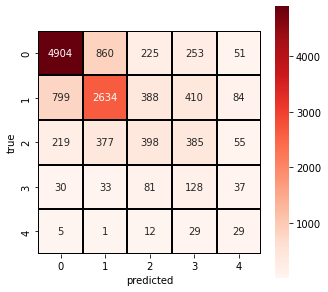

In [ ]:
matrix_plot(dtc_tuned)

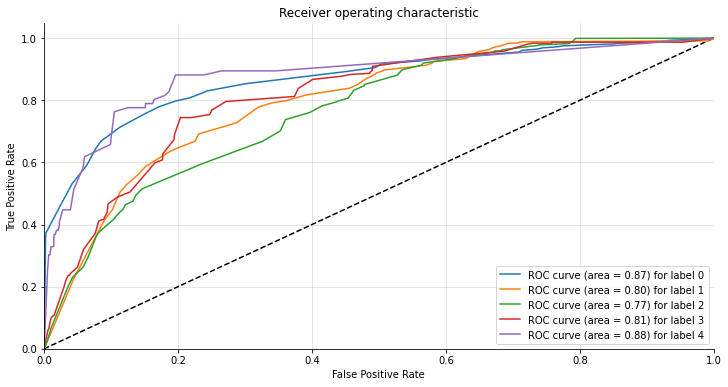

In [ ]:
#====== Plot ROC ========
plot_multiclass_roc(dtc_tuned, X_test, y_test, n_classes=5, figsize=(12, 6))

## KNN evaluation

In [ ]:
#==== Evaluate model knn_tuned on test data here =====
evaluate(knn_tuned)


Test Data Results: 
Area Under Curve (AUC): 0.70

CLASSIFICATION REPORT:
           No Injury      Minor   Moderate    Severe    Fatal  accuracy  \
precision     0.8288     0.5958     0.2299    0.1024   0.1238    0.5909   
recall        0.6970     0.5407     0.3647    0.2460   0.3289    0.5909   
f1-score      0.7572     0.5669     0.2820    0.1446   0.1799    0.5909   
support    6293.0000  4315.0000  1434.0000  309.0000  76.0000    0.5909   

            macro avg  weighted avg  
precision      0.3761        0.6564  
recall         0.4355        0.5909  
f1-score       0.3861        0.6175  
support    12427.0000    12427.0000  


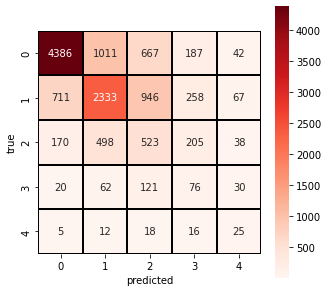

In [ ]:
matrix_plot(knn_tuned)

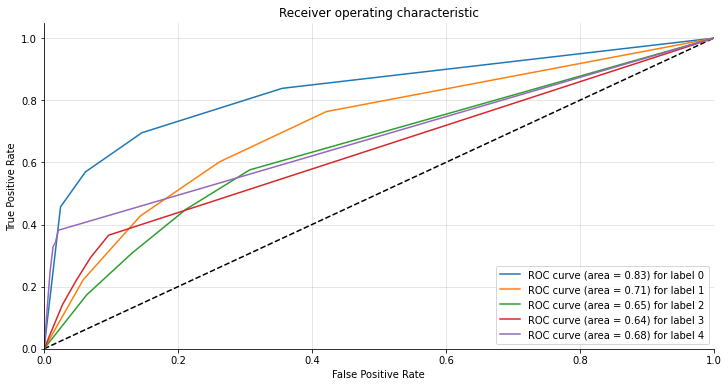

In [ ]:
#====== Plot ROC ========
plot_multiclass_roc(knn_tuned, X_test, y_test, n_classes=5, figsize=(12, 6))

## Random Forest evaluation

In [ ]:
#==== Evaluate model rnd_tuned on test data here =====
evaluate(rnd_tuned)


Test Data Results: 
Area Under Curve (AUC): 0.88

CLASSIFICATION REPORT:
           No Injury      Minor   Moderate    Severe    Fatal  accuracy  \
precision     0.8281     0.6639     0.3940    0.2611   0.3396    0.7054   
recall        0.8222     0.6786     0.4093    0.1909   0.2368    0.7054   
f1-score      0.8251     0.6712     0.4015    0.2206   0.2791    0.7054   
support    6293.0000  4315.0000  1434.0000  309.0000  76.0000    0.7054   

            macro avg  weighted avg  
precision      0.4973        0.7039  
recall         0.4676        0.7054  
f1-score       0.4795        0.7044  
support    12427.0000    12427.0000  


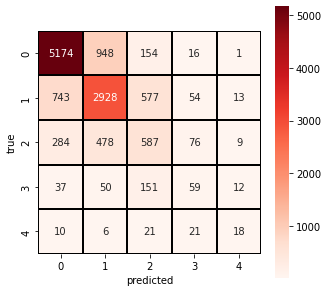

In [ ]:
matrix_plot(rnd_tuned)

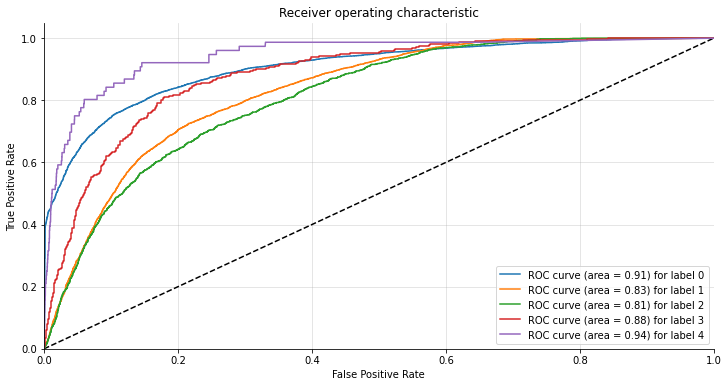

In [ ]:
#====== Plot ROC ========
plot_multiclass_roc(rnd_tuned, X_test, y_test, n_classes=5, figsize=(12, 6))

## XGboost evaluation

In [ ]:
#==== Evaluate model xgb_tuned on test data here =====
evaluate(xgb_tuned)


Test Data Results: 
Area Under Curve (AUC): 0.86

CLASSIFICATION REPORT:
           No Injury      Minor   Moderate    Severe    Fatal  accuracy  \
precision     0.8724     0.6433     0.3741    0.1638   0.1547    0.6753   
recall        0.7483     0.6959     0.3668    0.3657   0.5395    0.6753   
f1-score      0.8056     0.6686     0.3704    0.2262   0.2405    0.6753   
support    6293.0000  4315.0000  1434.0000  309.0000  76.0000    0.6753   

            macro avg  weighted avg  
precision      0.4417        0.7133  
recall         0.5432        0.6753  
f1-score       0.4623        0.6899  
support    12427.0000    12427.0000  


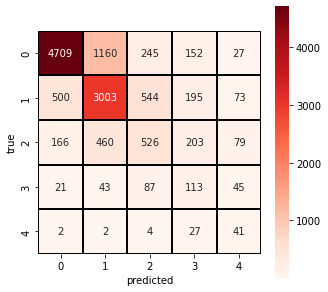

In [ ]:
matrix_plot(xgb_tuned)

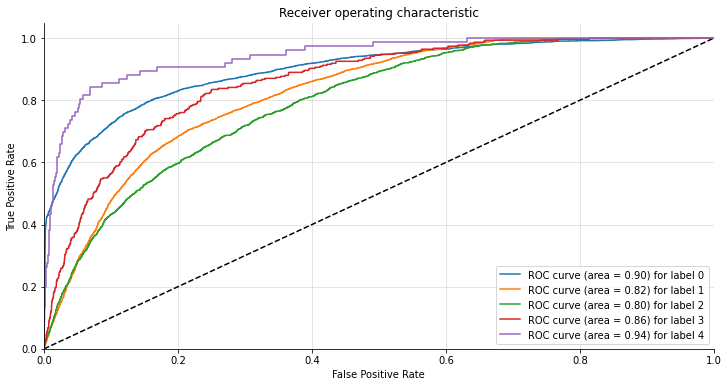

In [ ]:
#====== Plot ROC ========
plot_multiclass_roc(xgb_tuned, X_test, y_test, n_classes=5, figsize=(12, 6))